<a href="https://colab.research.google.com/github/ijul17/homework/blob/main/Yulia%20Urazova/Nordal_85C_dbscan_clastering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### **ЗАГРУЖАЕМ ДАННЫЕ**

**ЗАГРУЖАЕМ БИБЛИОТЕКИ**

In [ ]:
import zipfile
import requests
from io import BytesIO
import pandas as pd
import os
import gc
import matplotlib.pyplot as plt
import pandas as pd

#### **АНАЛИЗ ОДНОГО ФАЙЛА**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path_P2a = '/content/drive/MyDrive/Colab Notebooks/Юля учеба/Nordall/P-85C.csv'
#file_path_P2b = '/content/drive/MyDrive/Colab Notebooks/Юля учеба/Nordall/P-2B.csv'



In [ ]:
df_P2a = pd.read_csv(file_path_P2a)
df=df_P2a

df.drop(['P85C_I_frq',	'P85C_Q_frq',	'P85C_I_frq_std',	'P85C_Q_frq_std',	'PT-191_P-85C_std',	'TT-191_P-85C_std',	'VT-191_P-85C_std',	'VT-192_P-85C_std',	'VT-193_P-85C_std'], axis= 1 , inplace= True)
#df_P2b = pd.read_csv(file_path_P2b)
#df=pd.concat(['P2A_I_frq',	'P2A_Q_frq',	'P2A_I_frq_std',	'PIT_P2A_std',	'PT-111_P-2A_std',	'TT-111_P-2A_std',	'VT-111_P-2A_std',	'VT-112_P-2A_std',	'VT-113_P-2A_std',	'VTVT-121_P-2B_std',	'VT-113_P-P-2A_std'], ignore_index=False)
#df.drop(['P2A_I_frq',	'P2A_Q_frq',	'P2A_I_frq_std',	'PIT_P2A_std',	'PT-111_P-2A_std',	'TT-111_P-2A_std',	'VT-111_P-2A_std',	'VT-112_P-2A_std',	'VT-113_P-2A_std',	'VTVT-121_P-2B_std',	'VT-113_P-P-2A_std', 'P2A_Q_frq_std',	'VTVT-121_P-2B',	'VT-113_P-P-2A'], axis= 1 , inplace= True)
df.fillna(method='ffill', inplace=True) #заменим все NaN на предыдущие значения


In [ ]:
df["time"] = pd.to_datetime(df["time"])
df.set_index('time', inplace = True)
#df.drop('time',axis=1,inplace=True)
df

,PT-191_P-85C,TT-191_P-85C,VT-191_P-85C,VT-192_P-85C,VT-193_P-85C
time,,,,,
2023-08-27 18:05:00,-0.261566,28.428828,0.062088,0.144610,0.373921
2023-08-27 18:06:00,-0.264705,28.423551,0.058253,0.131195,0.417720
2023-08-27 18:07:00,-0.264324,28.419126,0.061607,0.132321,0.416795
2023-08-27 18:08:00,-0.264912,28.410327,0.061860,0.135079,0.473252
2023-08-27 18:09:00,-0.265549,28.402841,0.058718,0.132684,0.433391
...,...,...,...,...,...
2023-12-31 23:55:00,1.588936,30.281545,0.830517,3.041808,4.093296
2023-12-31 23:56:00,1.592188,30.274366,0.828271,3.085674,4.088314
2023-12-31 23:57:00,1.591212,30.269121,0.828383,3.036797,4.124961


In [ ]:
df['PT-191_P-85C'].max()

3.4363283515000003

In [ ]:
df.index[:5]

DatetimeIndex(['2023-08-27 18:05:00', '2023-08-27 18:06:00',
               '2023-08-27 18:07:00', '2023-08-27 18:08:00',
               '2023-08-27 18:09:00'],
              dtype='datetime64[ns]', name='time', freq=None)

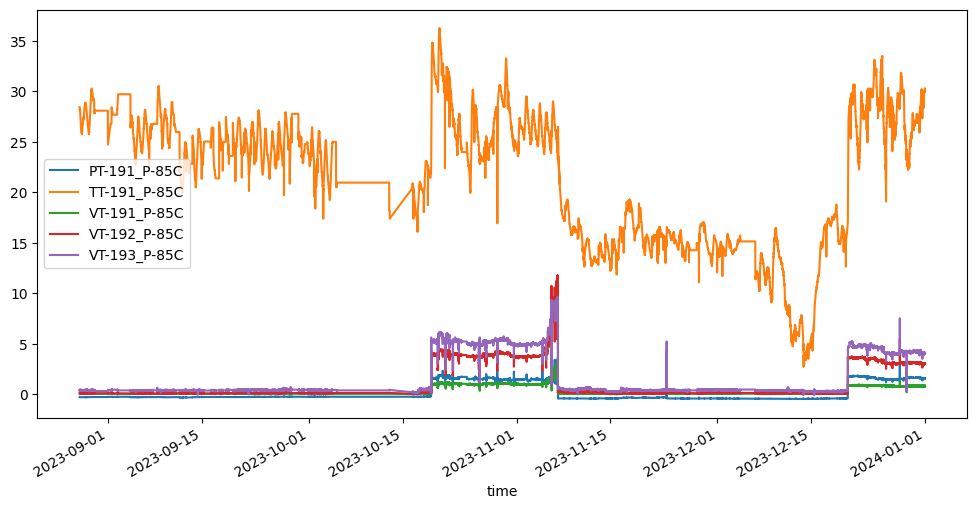

In [ ]:
import matplotlib.pyplot as plt
#df.plot(x='time', y=['PT-191_P-85C',	'TT-191_P-85C',	'VT-191_P-85C',	'VT-192_P-85C',	'VT-193_P-85C'])
df.plot(figsize = (12,6))
plt.show()

In [ ]:
# импортируем функцию seasonal_decompose из statsmodels
#from statsmodels.tsa.seasonal import seasonal_decompose

# задаем размер графика
#from pylab import rcParams
#rcParams['figure.figsize'] = 11, 9

# применяем функцию к данным
#decompose = seasonal_decompose(df)
#decompose.plot()

#plt.show()

Значения для датчика: 85c TT 60. max65, PT 1.9. max 1.53, VT <2.8 normal, 2.8-7.1 high, >7.1 abnormal

In [ ]:
def for_85cTT(row):
  '''функция для определения критичных значенй для датчика ТЕМПЕРАТУРЫ.
  Присвоение степени "Высокая" происходит при пороге -3% от максимального
  При значении больше максимального - степень "Критическая". Применим к показаниям поправочный коэффициент для этого датчика +13
  (среднее из предоставленных данных для сравнения)'''
  max_t=65
  if (row['TT-191_P-85C']+13) <=0.98*max_t:
        return 0
  elif (row['TT-111_P-2A']+13) >0.98*max_t<max_t:
        return 1
  else:
        return 2

In [ ]:
df['cat_for_85cTT'] = df.apply(for_85cTT, axis=1)

In [ ]:
df['cat_for_85cTT'].value_counts()

cat_for_85cTT
0    176513
Name: count, dtype: int64

In [ ]:
def for_85cPT(row):
    '''функция для определения критичных значенй для датчика ДАВЛЕНИЯ.
  Присвоение степени "Высокая" происходит при пороге -3% от максимального
  При значении больше максимального - степень "Критическая". Прменим добавочный коэффициент к показаниям датасета +0.1'''
    max_pt=1.53
    if (row['PT-191_P-85C']+0.1) <=0.98*max_pt:
        return 0 #normal
    elif 0.98*max_pt<(row['PT-191_P-85C']+0.1) <max_pt:
        return 1 #high
    else:
        return 2 #critical

In [ ]:
df['cat_for_85cPT'] = df.apply(for_85cPT, axis=1)
df['cat_for_85cPT'].value_counts()

cat_for_85cPT
0    135675
2     38880
1      1958
Name: count, dtype: int64

In [ ]:
def for_P2aVT(row):
    '''функция для определения критичных значенй для датчика ВИБРАЦИИ - виброускорение.
  Присвоение степени "Высокая" происходит при пороге 2.8-7.1
  При значении больше 7.1  - степень "Критическая"'''
    predmax_vt=0.97*(for_vt11_mean+for_vt11_max)
    #max_vt=7.1
    if row['VT-111_P-2A', 'VT-112_P-2A', 'VT-113_P-2A'] <predmax_vt:
     #   return 'normal'
    #elif predmax_vt<=row['PT-111_P-2A'] <max_vt:
     #   return 'high'
    #else:
     #   return 'critical'

SyntaxError: incomplete input (<ipython-input-13-2e1839bc6bb5>, line 12)

In [ ]:
#df['for_P2aVT'] = df.apply(for_P2aVT, axis=1)
#df['for_P2aVT'].value_counts()

In [ ]:
df.head()

,PT-191_P-85C,TT-191_P-85C,VT-191_P-85C,VT-192_P-85C,VT-193_P-85C,cat_for_85cTT,cat_for_85cPT
time,,,,,,,
2023-08-27 18:05:00,-0.261566,28.428828,0.062088,0.144610,0.373921,0,0
2023-08-27 18:06:00,-0.264705,28.423551,0.058253,0.131195,0.417720,0,0
2023-08-27 18:07:00,-0.264324,28.419126,0.061607,0.132321,0.416795,0,0
2023-08-27 18:08:00,-0.264912,28.410327,0.061860,0.135079,0.473252,0,0
2023-08-27 18:09:00,-0.265549,28.402841,0.058718,0.132684,0.433391,0,0


In [ ]:
import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics

from sklearn.preprocessing import StandardScaler

In [ ]:
X0=df.to_numpy()
#X = StandardScaler().fit_transform(X)


In [ ]:
# Compute DBSCAN
db = DBSCAN(eps=0.7, min_samples=10).fit(X0)
#y_pred = db.fit_predict(X, y=None)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels0 = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels0)) - (1 if -1 in labels0 else 0)
n_noise_ = list(labels0).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)



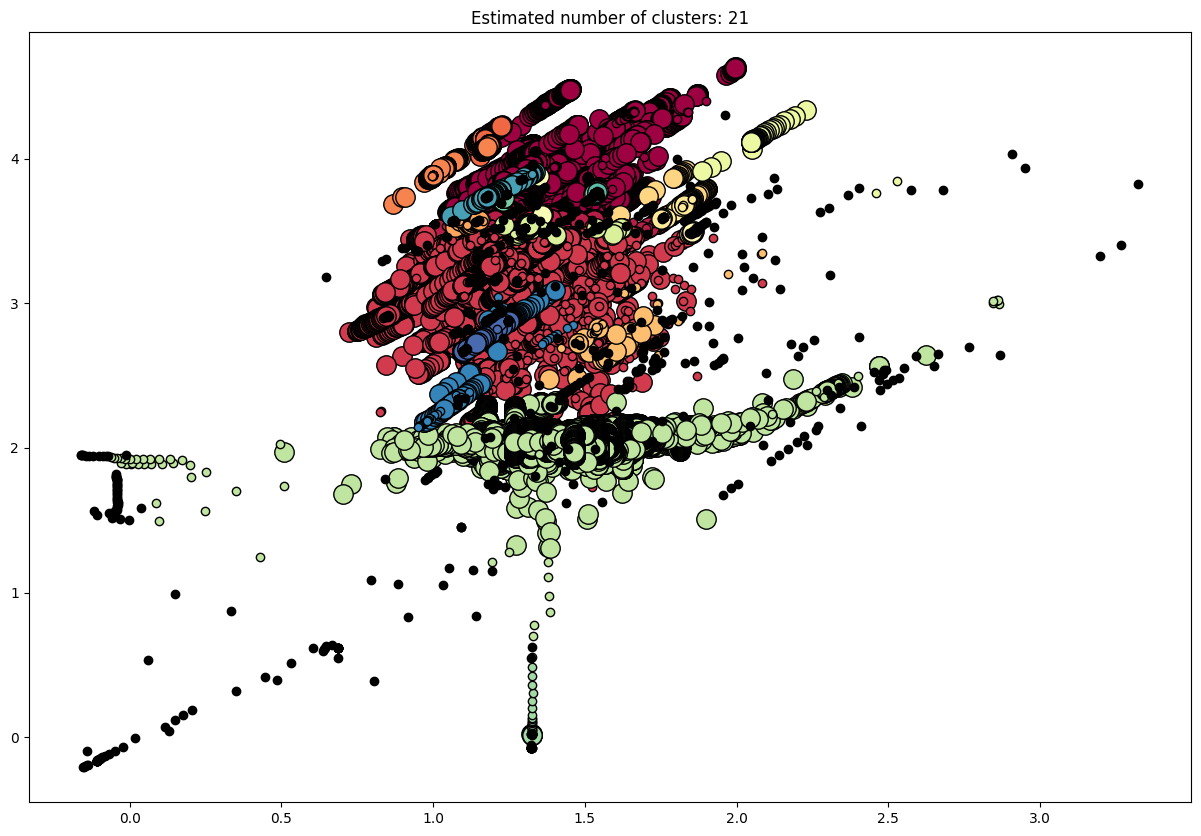

In [ ]:
import matplotlib.pyplot as plt

unique_labels = set(labels0)
core_samples_mask = np.zeros_like(labels0, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
plt.figure(figsize=(15,10))

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels0 == k

    xy = X0[class_member_mask & core_samples_mask]

    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = X0[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6
    )

plt.title(f"Estimated number of clusters: {n_clusters_}")
plt.show()

In [ ]:
df_clasterized=pd.DataFrame(X0)
df_clasterized.columns=['PIT_P2A',	'PT-111_P-2A',	'TT-111_P-2A',	'VT-111_P-2A',	'VT-112_P-2A','VT-113_P-2A',	'cat_for_P2aTT',	'cat_for_P2aPT']
df_clasterized['class']=pd.DataFrame(labels0)

df_clasterized

,PIT_P2A,PT-111_P-2A,TT-111_P-2A,VT-111_P-2A,VT-112_P-2A,VT-113_P-2A,cat_for_P2aTT,cat_for_P2aPT,class
0,1.648983,3.722250,27.395230,2.144998,4.591376,9.567699,0.0,2.0,0
1,1.648923,3.729861,27.381772,2.139853,4.577248,9.752089,0.0,2.0,0
2,1.649897,3.730316,27.356091,2.152397,4.570641,9.740019,0.0,2.0,0
3,1.649594,3.725451,27.336631,2.158277,4.578770,9.773133,0.0,2.0,0
4,1.649357,3.727881,27.330388,2.156730,4.584868,9.763785,0.0,2.0,0
...,...,...,...,...,...,...,...,...,...
176508,1.465614,1.960924,13.656949,0.117071,0.103017,0.465263,0.0,0.0,14
176509,1.465093,1.965749,13.661426,0.125162,0.111702,0.467404,0.0,0.0,14
176510,1.464754,1.966863,13.665701,0.113649,0.113353,0.536485,0.0,0.0,14
176511,1.465045,1.966876,13.670980,0.115304,0.103430,0.484167,0.0,0.0,14


In [ ]:
df_clasterized['class'].value_counts()

class
 2     81195
 14    48946
 0     28625
 1      9901
 4      2760
 13     2072
 5       857
-1       741
 11      237
 8       233
 19      201
 20      173
 18       98
 16       78
 7        75
 6        67
 15       49
 9        49
 3        46
 12       44
 10       43
 17       23
Name: count, dtype: int64

##вариант 2

In [ ]:
X_test1=df.to_numpy()

In [ ]:
# Compute DBSCAN
db = DBSCAN(eps=0.7, min_samples=100).fit(X_test1)
#y_pred = db.fit_predict(X, y=None)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels_test_1 = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels_test_1)) - (1 if -1 in labels_test_1 else 0)
n_noise_ = list(labels_test_1).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

Estimated number of clusters: 15
Estimated number of noise points: 2091


In [ ]:
df_clasterized_test_1=pd.DataFrame(X_test1)
df_clasterized_test_1.columns=['PIT_P2A',	'PT-111_P-2A',	'TT-111_P-2A',	'VT-111_P-2A',	'VT-112_P-2A','VT-113_P-2A',	'cat_for_P2aTT',	'cat_for_P2aPT']
df_clasterized_test_1['class']=pd.DataFrame(labels_test_1)

df_clasterized_test_1

,PIT_P2A,PT-111_P-2A,TT-111_P-2A,VT-111_P-2A,VT-112_P-2A,VT-113_P-2A,cat_for_P2aTT,cat_for_P2aPT,class
0,1.648983,3.722250,27.395230,2.144998,4.591376,9.567699,0.0,2.0,0
1,1.648923,3.729861,27.381772,2.139853,4.577248,9.752089,0.0,2.0,0
2,1.649897,3.730316,27.356091,2.152397,4.570641,9.740019,0.0,2.0,0
3,1.649594,3.725451,27.336631,2.158277,4.578770,9.773133,0.0,2.0,0
4,1.649357,3.727881,27.330388,2.156730,4.584868,9.763785,0.0,2.0,0
...,...,...,...,...,...,...,...,...,...
176508,1.465614,1.960924,13.656949,0.117071,0.103017,0.465263,0.0,0.0,11
176509,1.465093,1.965749,13.661426,0.125162,0.111702,0.467404,0.0,0.0,11
176510,1.464754,1.966863,13.665701,0.113649,0.113353,0.536485,0.0,0.0,11
176511,1.465045,1.966876,13.670980,0.115304,0.103430,0.484167,0.0,0.0,11


In [ ]:
df_clasterized_test_1['class'].value_counts()

class
 2     80551
 11    48925
 0     28513
 1      9713
 4      2760
-1      2091
 10     2059
 6       425
 5       385
 7       233
 9       209
 14      166
 12      142
 8       126
 13      111
 3       104
Name: count, dtype: int64

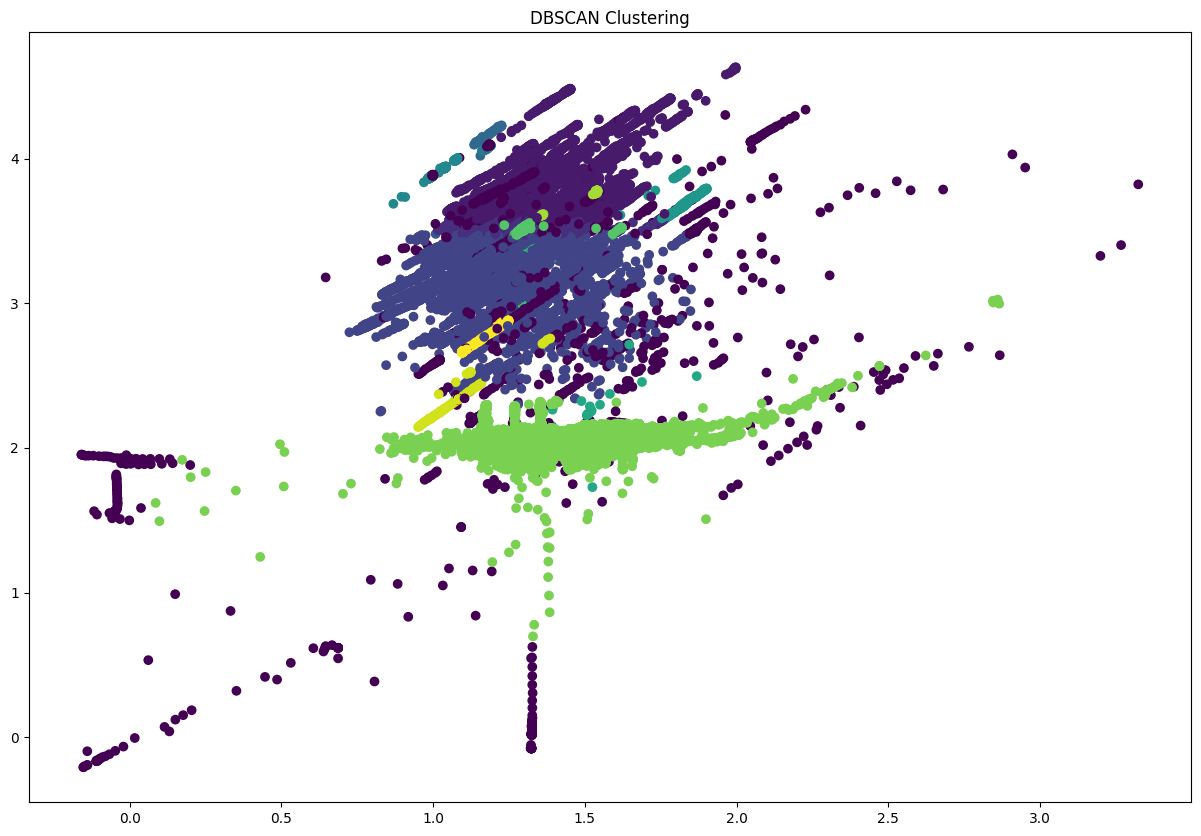

In [ ]:
plt.figure(figsize=(15,10))
plt.scatter(X_test1[:, 0], X[:, 1], c=labels_test_1, cmap='viridis')
plt.title('DBSCAN Clustering')
plt.show()

##hdbscan

In [ ]:
!pip install hdbscan


import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, adjusted_rand_score

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 18.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached Cython-0.29.37-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.9 MB)
  Created wheel for hdbscan: filename=hdbscan-0.8.33-cp310-cp310-linux_x86_64.whl size=3039279 sha256=73dec8d641046264b9881608390a0fc125029a25ff53d00d351b4a20075010f5
  Stored in directory: /root/.cache/pip/wheels/75/0b/3b/dc4f60b7cc455efaefb62883a7483e76f09d06ca81cf87d610
Successfully built hdbscan
  Attempting uninstall: cython
    Found existing installation: Cython 3.0.10
    Uninstalling Cython-3.0.10:
      Successfully uninstalled Cython-3.0.10


In [ ]:
import hdbscan

In [ ]:
# Initialize HDBSCAN with additional parameters
clusterer = hdbscan.HDBSCAN(min_cluster_size=500,
                            min_samples=1000,
                            allow_single_cluster=False,
                            metric='euclidean',
                            leaf_size=5)

In [ ]:
X1=df.to_numpy()

In [ ]:
# Fit the model to the data
clusterer.fit(X1)

In [ ]:
# Evaluate clustering
labels1 = clusterer.labels_
#silhouette_avg = silhouette_score(X, labels)

# Evaluation metrics
#print("Silhouette Coefficient: {:.2f}".format(silhouette_avg))


In [ ]:
core_samples_mask = np.zeros_like(labels1, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True


# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels1)) - (1 if -1 in labels1 else 0)
n_noise_ = list(labels1).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

Estimated number of clusters: 52
Estimated number of noise points: 64265


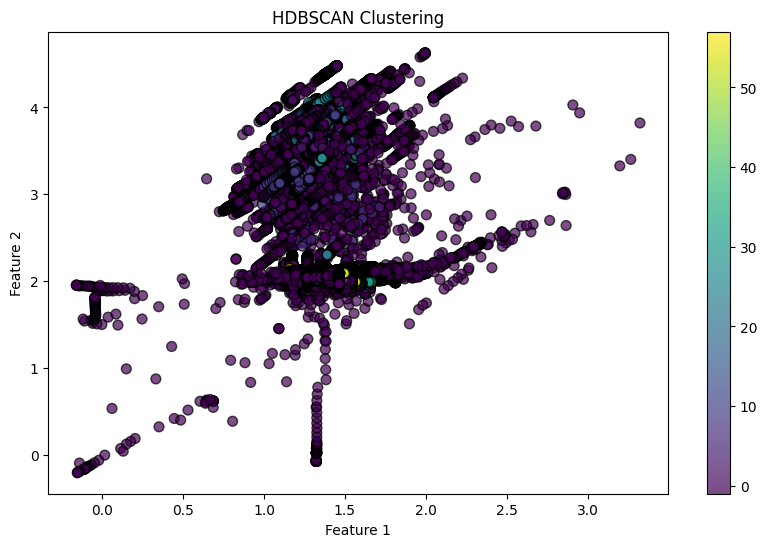

In [ ]:
# Visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(X1[:, 0], X1[:, 1], c=clusterer.labels_,
            cmap='viridis', s=50, alpha=0.7, edgecolors='k')
plt.colorbar()
plt.title('HDBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [ ]:
df_clasterized1=pd.DataFrame(X1)
df_clasterized1.columns=['PIT_P2A',	'PT-111_P-2A',	'TT-111_P-2A',	'VT-111_P-2A',	'VT-112_P-2A','VT-113_P-2A',	'cat_for_P2aTT',	'cat_for_P2aPT']
df_clasterized1['class']=pd.DataFrame(labels1)
df_clasterized1

,PIT_P2A,PT-111_P-2A,TT-111_P-2A,VT-111_P-2A,VT-112_P-2A,VT-113_P-2A,cat_for_P2aTT,cat_for_P2aPT,class
0,1.648983,3.722250,27.395230,2.144998,4.591376,9.567699,0.0,2.0,-1
1,1.648923,3.729861,27.381772,2.139853,4.577248,9.752089,0.0,2.0,-1
2,1.649897,3.730316,27.356091,2.152397,4.570641,9.740019,0.0,2.0,-1
3,1.649594,3.725451,27.336631,2.158277,4.578770,9.773133,0.0,2.0,67
4,1.649357,3.727881,27.330388,2.156730,4.584868,9.763785,0.0,2.0,67
...,...,...,...,...,...,...,...,...,...
176508,1.465614,1.960924,13.656949,0.117071,0.103017,0.465263,0.0,0.0,-1
176509,1.465093,1.965749,13.661426,0.125162,0.111702,0.467404,0.0,0.0,-1
176510,1.464754,1.966863,13.665701,0.113649,0.113353,0.536485,0.0,0.0,-1
176511,1.465045,1.966876,13.670980,0.115304,0.103430,0.484167,0.0,0.0,-1


In [ ]:
df_clasterized['class'].value_counts()

class
-1      56390
 215    11271
 378     3832
 200     3350
 0       2760
        ...  
 289       51
 324       51
 63        50
 318       50
 73        50
Name: count, Length: 429, dtype: int64

##KMeans и KNN модуль PyOD

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
%matplotlib inline


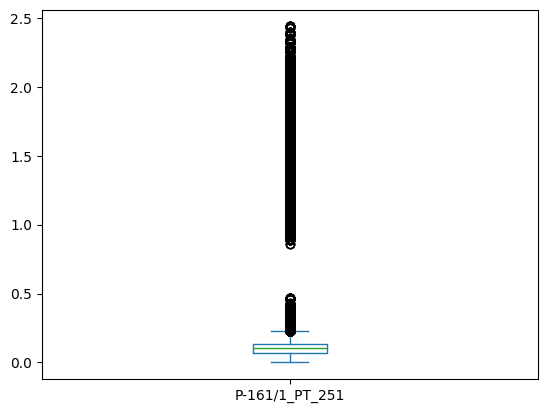

In [ ]:
df['P-161/1_PT_251'].plot(kind='box')
plt.show()

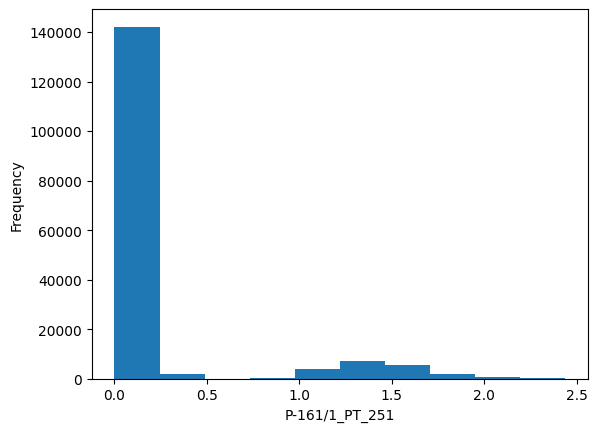

In [ ]:
ax=df['P-161/1_PT_251'].plot(kind='hist')
ax.set_xlabel('P-161/1_PT_251')
plt.show()

In [ ]:
print('max '+str(df['P-161/1_PT_251'].max()))
print('min '+str(df['P-161/1_PT_251'].min()))

max 2.43752146
min 0.0


In [ ]:
value_161_1_PT_251=df['P-161/1_PT_251'].values

In [ ]:
value_161_1_PT_251=value_161_1_PT_251.reshape(-1,1)
value_161_1_PT_251=value_161_1_PT_251.astype('float64')

In [ ]:
from scipy.cluster.vq import kmeans

In [ ]:
codebook, distortion = kmeans(value_161_1_PT_251, 2)

In [ ]:
from scipy.cluster.vq import vq

In [ ]:
groups, cdist = vq(value_161_1_PT_251, codebook)

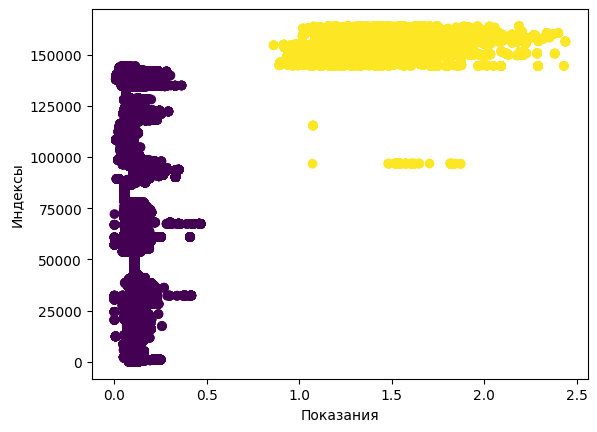

In [ ]:
plt.scatter(value_161_1_PT_251, np.arange(0, 164011), c=groups)
plt.xlabel('Показания')
plt.ylabel('Индексы')

plt.show()